# UTS Deep Learning - No 1

#### Nama: Farren Angelica Dinzani
#### NIM: 2702243546
#### Dataset: 1A
#### Link video: https://drive.google.com/file/d/1JV4M9mNmjGevwa4qRj6FSAwViduDzjDr/view?usp=sharing

# EDA & PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

#### Read data

In [2]:
df = pd.read_parquet('dataset_1A.parquet')
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,8,3,Sunday,Yes,24.492063,59.969085,1403.454805,7,On,Off,29.965327,82.05735763545306
1,1,8,Wednesday,No,26.312114,51.408711,1220.547133,8,On,Off,5.986875,83.88917674427188
2,1,19,Sunday,Yes,20.516186,40.918500,1114.230124,8,Off,On,20.489098,66.20209750906106
3,7,3,Wednesday,Yes,20.879426,46.859237,1096.207227,7,Off,On,21.321157,66.43917871187017
4,10,17,Saturday,No,23.015216,48.998158,1999.982252,1,Off,Off,3.966075,76.90227179904673


#### Informasi data

In [3]:
df.shape

(1232, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1232 non-null   object 
 1   Hour               1232 non-null   int64  
 2   DayOfWeek          1232 non-null   object 
 3   Holiday            1232 non-null   object 
 4   Temperature        1232 non-null   float64
 5   Humidity           1232 non-null   float64
 6   SquareFootage      1232 non-null   float64
 7   Occupancy          1232 non-null   int64  
 8   HVACUsage          1232 non-null   object 
 9   LightingUsage      1232 non-null   object 
 10  RenewableEnergy    1232 non-null   float64
 11  EnergyConsumption  1232 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 115.6+ KB


- Dataset terdiri dari 12 kolom.
- Memua kolom memiliki nilai non-null yang cukup.
- Kolom EnergyConsumption yang perlu diubah menjadi tipe float.

In [ ]:
df['EnergyConsumption'] = pd.to_numeric(df['EnergyConsumption'], errors='coerce')

In [6]:
df['Month'].value_counts()

1            189
4            119
10           115
3            100
12            99
6             95
11            93
8             90
7             88
5             84
9             83
2             64
Sep            7
July           4
September      2
Name: Month, dtype: int64

Pada kolom 'Month' terdapat data yang tidak sesuai dengan format yang diharapkan. Data tersebut adalah 'Sep', 'July', dan 'September'. Harus diubah menjadi '9', '7', dan '9' agar sesuai dengan format.

In [ ]:
df['Month'] = df['Month'].replace({'Sep': 9, 'July': 7, 'September': 9})

Ubah data type 'Month' menjadi int

In [8]:
df['Month'] = df['Month'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1232 non-null   int64  
 1   Hour               1232 non-null   int64  
 2   DayOfWeek          1232 non-null   object 
 3   Holiday            1232 non-null   object 
 4   Temperature        1232 non-null   float64
 5   Humidity           1232 non-null   float64
 6   SquareFootage      1232 non-null   float64
 7   Occupancy          1232 non-null   int64  
 8   HVACUsage          1232 non-null   object 
 9   LightingUsage      1232 non-null   object 
 10  RenewableEnergy    1232 non-null   float64
 11  EnergyConsumption  1229 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 115.6+ KB


In [10]:
df.columns

Index(['Month', 'Hour', 'DayOfWeek', 'Holiday', 'Temperature', 'Humidity',
       'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage',
       'RenewableEnergy', 'EnergyConsumption'],
      dtype='object')

#### Prepare data (input & target)

In [ ]:
df_input=df[['Month', 'Hour', 'Holiday', 'Temperature', 'Humidity','SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy']]
df_target=df[['EnergyConsumption']]

#### Visualisasi distribusi kolom target: EnergyConsumption

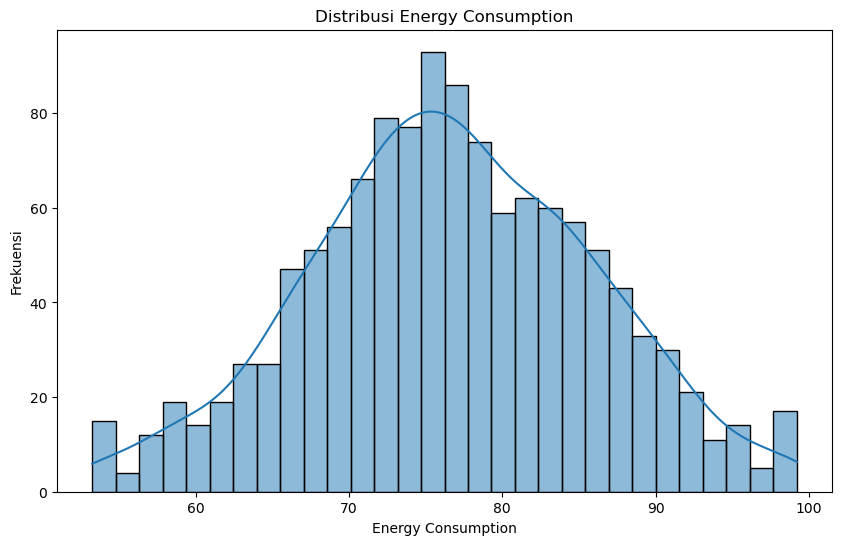

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['EnergyConsumption'], bins=30, kde=True)
plt.title('Distribusi Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frekuensi')
plt.show()

- Data terdistribusi hampir normal, dengan sebagian besar nilai EnergyConsumption berkisar antara 60 hingga 90. 
- Menunjukkan bahwa sebagian besar gedung memiliki konsumsi energi yang serupa.

#### Visualisasi korelasi antar fitur

<Axes: >

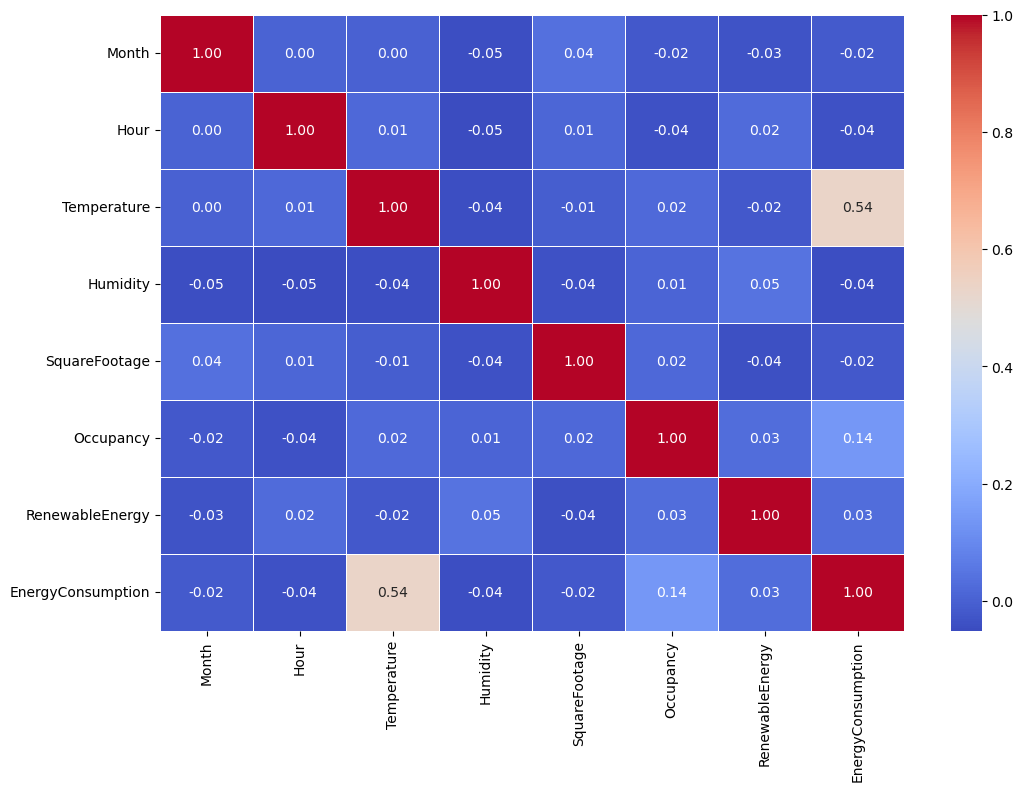

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

- Temperature memiliki korelasi yang cukup kuat dengan EnergyConsumption.
- Masuk akal karena suhu ruangan dapat mempengaruhi penggunaan energi untuk pendinginan atau pemanasan.

#### Data splitting
Menjadi train, val, dan test dengan proporsi 70:10:20

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(df_input, df_target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

#### Cek missing value

In [ ]:
print(X_train.isnull().sum())

Month              0
Hour               0
Holiday            0
Temperature        0
Humidity           0
SquareFootage      0
Occupancy          0
HVACUsage          0
LightingUsage      0
RenewableEnergy    0
dtype: int64


Tidak ada missing value

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 2 to 1126
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            862 non-null    int64  
 1   Hour             862 non-null    int64  
 2   Holiday          862 non-null    object 
 3   Temperature      862 non-null    float64
 4   Humidity         862 non-null    float64
 5   SquareFootage    862 non-null    float64
 6   Occupancy        862 non-null    int64  
 7   HVACUsage        862 non-null    object 
 8   LightingUsage    862 non-null    object 
 9   RenewableEnergy  862 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 74.1+ KB


#### Encoding

Kolom Holiday, HVACUsage, dan LightingUsage adalah variabel kategorikal dengan nilai Yes/No atau On/Off yang perlu diubah menjadi 1/0 untuk dapat digunakan dalam model.

In [ ]:
X_train['Holiday'] = X_train['Holiday'].map({'Yes': 1, 'No': 0})
X_test['Holiday'] = X_test['Holiday'].map({'Yes': 1, 'No': 0})
X_val['Holiday'] = X_val['Holiday'].map({'Yes': 1, 'No': 0})

X_train['HVACUsage'] = X_train['HVACUsage'].map({'On': 1, 'Off': 0})
X_test['HVACUsage'] = X_test['HVACUsage'].map({'On': 1, 'Off': 0})
X_val['HVACUsage'] = X_val['HVACUsage'].map({'On': 1, 'Off': 0})

X_train['LightingUsage'] = X_train['LightingUsage'].map({'On': 1, 'Off': 0})
X_test['LightingUsage'] = X_test['LightingUsage'].map({'On': 1, 'Off': 0})
X_val['LightingUsage'] = X_val['LightingUsage'].map({'On': 1, 'Off': 0})

#### cek NaN 

In [ ]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(y_train))) 

print(np.any(np.isnan(X_test)))
print(np.any(np.isnan(y_test)))

print(np.any(np.isnan(X_val)))
print(np.any(np.isnan(y_val)))

False
True
False
False
False
False


Terdapat NaN pada y_train, dan lakukan fillna untuk mengisi nilai NaN dengan mean.

In [ ]:
y_train = y_train.fillna(y_train.mean())

#### Standard Scaling

In [ ]:
standard_scaler = StandardScaler()

X_train_standardized = standard_scaler.fit_transform(X_train)
X_val_standardized = standard_scaler.transform(X_val)
X_test_standardized = standard_scaler.transform(X_test)

#### Cek data sebelum melakukan model

In [108]:
X_test.head()

,Month,Hour,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy
1219,8,12,1,20.126991,51.408470,1492.203415,7,0,1,5.601723
355,2,1,1,26.823037,39.000664,1998.439525,3,1,0,23.662534
415,3,15,0,29.998671,43.798996,1404.058579,3,1,1,7.159337
310,2,5,1,28.295123,42.784629,1141.161725,1,0,0,9.487899
344,11,15,1,27.558304,35.324520,1206.614730,1,1,1,8.092473


In [23]:
import tensorflow as tf

# Mendapatkan daftar perangkat fisik GPU
physical_devices = tf.config.list_physical_devices('GPU')

# Nonaktifkan GPU dengan menyembunyikan GPU
if len(physical_devices) > 0:
    tf.config.set_visible_devices([], 'GPU')

# SEQUENTIAL MODEL
Dalam model ini, setiap lapisan (layer) tersambung secara berurutan dari lapisan input hingga lapisan output. 

#### Pembuatan model Sequential
- Input layer: Jumlah fitur = 10
- Hidden layer: Jumlah neuron untuk setiap layer adalah 20, karena input memiliki 10 fitur
- Output layer: Memiliki 1 neuron karena kita melakukan regresi, di mana kita ingin memprediksi EnergyConsumption, yang merupakan nilai kontinu.
- Compile model: Fungsi loss yang digunakan adalah mean_squared_error (MSE), ideal untuk regresi.

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Input, Model
import tensorflow as tf

input_dim = X_train.shape[1]

model_sequential = Sequential()

model_sequential.add(tf.keras.Input(shape=(input_dim,)))

model_sequential.add(layers.Dense(2 * input_dim, activation='relu'))  
model_sequential.add(layers.Dense(2 * input_dim, activation='relu')) 

model_sequential.add(layers.Dense(1))

model_sequential.compile(optimizer='adam', loss='mean_squared_error', 
                          metrics=['mae', 'mape', tf.keras.metrics.RootMeanSquaredError()])

model_sequential.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661 (2.58 KB)

 Trainable params: 661 (2.58 KB)

 Non-trainable params: 0 (0.00 B)

Training: Model dilatih menggunakan 15 epoch.

In [ ]:
model_sequential.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.7545 - mae: 6.2082 - mape: 8.2447 - root_mean_squared_error: 7.8521 - val_loss: 85.4363 - val_mae: 7.6835 - val_mape: 10.1452 - val_root_mean_squared_error: 9.2432
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.4547 - mae: 6.3566 - mape: 8.4657 - root_mean_squared_error: 8.0886 - val_loss: 90.0275 - val_mae: 7.9099 - val_mape: 10.3797 - val_root_mean_squared_error: 9.4883
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.3369 - mae: 6.5088 - mape: 8.5728 - root_mean_squared_error: 8.2646 - val_loss: 75.2581 - val_mae: 6.5077 - val_mape: 9.1421 - val_root_mean_squared_error: 8.6751
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69.7819 - mae: 6.5294 - mape: 8.7844 - root_mean_squared_error: 8.3510 - val_loss: 73.7685 - val_mae: 6.8928 - val_mape: 9.3496 - val_root_mean_squared_error: 8.5889
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.5166 - mae: 6.3112 - mape: 8.4263 - root_

# FUNCTIONAL MODEL
Lebih fleksibel dibandingkan Sequential Model. Functional memungkinkan pembuatan model yang lebih kompleks dengan berbagai input, output, dan koneksi yang lebih rumit. 

#### Pembuatan model Functional
- Input layer: Jumlah fitur = 10
- Hidden layer: Jumlah neuron untuk setiap layer adalah 20, karena input memiliki 10 fitur
- Output layer: Memiliki 1 neuron karena kita melakukan regresi, di mana kita ingin memprediksi EnergyConsumption, yang merupakan nilai kontinu.
- Compile model: Fungsi loss yang digunakan adalah mean_squared_error (MSE), ideal untuk regresi.

In [ ]:
from tensorflow.keras import layers, Input, Model

inputs = Input(shape=(input_dim,))

x = layers.Dense(2 * input_dim, activation='relu')(inputs)
x = layers.Dense(2 * input_dim, activation='relu')(x)

outputs = layers.Dense(1)(x)  # Output layer (regresi)

model_functional = Model(inputs=inputs, outputs=outputs)

model_functional.compile(optimizer='adam', loss='mean_squared_error', 
                         metrics=['mae', 'mape', tf.keras.metrics.RootMeanSquaredError()])

print("Functional Model Summary:")
model_functional.summary()

Functional Model Summary:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661 (2.58 KB)

 Trainable params: 661 (2.58 KB)

 Non-trainable params: 0 (0.00 B)

Training: Model dilatih menggunakan 15 epoch.

In [ ]:
model_functional.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), verbose=2)

Epoch 1/15
27/27 - 0s - 4ms/step - loss: 72.3171 - mae: 6.9013 - mape: 9.1790 - root_mean_squared_error: 8.5039 - val_loss: 73.0154 - val_mae: 6.6162 - val_mape: 9.1384 - val_root_mean_squared_error: 8.5449
Epoch 2/15
27/27 - 0s - 3ms/step - loss: 73.3371 - mae: 6.8222 - mape: 9.0588 - root_mean_squared_error: 8.5637 - val_loss: 77.4449 - val_mae: 7.1628 - val_mape: 9.6364 - val_root_mean_squared_error: 8.8003
Epoch 3/15
27/27 - 0s - 3ms/step - loss: 67.1327 - mae: 6.4978 - mape: 8.6627 - root_mean_squared_error: 8.1935 - val_loss: 74.3012 - val_mae: 6.5541 - val_mape: 9.1479 - val_root_mean_squared_error: 8.6198
Epoch 4/15
27/27 - 0s - 3ms/step - loss: 66.4327 - mae: 6.4879 - mape: 8.6473 - root_mean_squared_error: 8.1506 - val_loss: 74.0580 - val_mae: 6.8401 - val_mape: 9.3212 - val_root_mean_squared_error: 8.6057
Epoch 5/15
27/27 - 0s - 3ms/step - loss: 71.4347 - mae: 6.7012 - mape: 8.9125 - root_mean_squared_error: 8.4519 - val_loss: 74.7921 - val_mae: 6.9241 - val_mape: 9.3999 - v

# MODIFIKASI SEQUENTIAL MODEL

1. Input layer: sesuai dengan jumlah fitur input = 10
2. Hidden layer pertama: 
    - menambah jumlah neuron menjadi tiga kali lipat dimensi input untuk meningkatkan kapasitas model.
    - Leaky ReLU mencegah masalah "dying neurons" dengan memberikan nilai kecil untuk nilai negatif (alpha=0.3).
    - Batch Normalization untuk membantu model belajar lebih cepat dan stabil.
    - Menggunakan Dropout sebesar 30% untuk mencegah overfitting.
3. Hidden layer kedua: Neuron lebih banyak lagi, konfigurasi sama.
4. Hidden layer ketiga: 2x jumlah neuron dari dimensi input.
5. Output layer: 1 neuron, karena kita melakukan tugas regresi untuk memprediksi nilai kontinu dari EnergyConsumption.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

model_sequential_modif = Sequential()

# Input layer
model_sequential_modif.add(tf.keras.Input(shape=(X_train.shape[1],)))

# Hidden layer pertama
model_sequential_modif.add(Dense(3 * X_train.shape[1]))  
model_sequential_modif.add(LeakyReLU(alpha=0.3))  
model_sequential_modif.add(BatchNormalization()) 
model_sequential_modif.add(Dropout(0.3))

# Hidden layer kedua 
model_sequential_modif.add(Dense(3 * X_train.shape[1])) 
model_sequential_modif.add(LeakyReLU(alpha=0.3)) 
model_sequential_modif.add(BatchNormalization()) 
model_sequential_modif.add(Dropout(0.3)) 

# Hidden layer ketiga 
model_sequential_modif.add(Dense(2 * X_train.shape[1]))
model_sequential_modif.add(LeakyReLU(alpha=0.3))
model_sequential_modif.add(BatchNormalization()) 
model_sequential_modif.add(Dropout(0.3))

# Output layer
model_sequential_modif.add(Dense(1))

optimizer = Adam(learning_rate=0.0005) 

model_sequential_modif.compile(optimizer=optimizer, loss='mean_squared_error', 
                                metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae', 'mape'])

model_sequential_modif.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,221 (8.68 KB)

 Trainable params: 2,061 (8.05 KB)

 Non-trainable params: 160 (640.00 B)

- Early stopping: Menghentikan training jika tidak ada perbaikan pada val_loss dalam 5 epoch berturut-turut.
- Training: Dilatih selama 50 epoch, dengan validation data untuk memantau overfitting. Early stopping memastikan bahwa pelatihan berhenti saat model mulai mengalami overfitting.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_sequential_modif.fit(X_train, y_train, epochs=50, verbose=2, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
27/27 - 0s - 4ms/step - loss: 181.4971 - mae: 10.6602 - mape: 14.0420 - root_mean_squared_error: 13.4721 - val_loss: 69.4552 - val_mae: 6.5999 - val_mape: 9.0207 - val_root_mean_squared_error: 8.3340
Epoch 2/50
27/27 - 0s - 3ms/step - loss: 195.4977 - mae: 11.2098 - mape: 14.8383 - root_mean_squared_error: 13.9820 - val_loss: 69.0139 - val_mae: 6.5700 - val_mape: 8.9823 - val_root_mean_squared_error: 8.3075
Epoch 3/50
27/27 - 0s - 3ms/step - loss: 197.6206 - mae: 11.2334 - mape: 14.8261 - root_mean_squared_error: 14.0578 - val_loss: 72.7347 - val_mae: 6.5698 - val_mape: 9.0922 - val_root_mean_squared_error: 8.5285
Epoch 4/50
27/27 - 0s - 3ms/step - loss: 198.1405 - mae: 11.1424 - mape: 14.6385 - root_mean_squared_error: 14.0762 - val_loss: 72.2332 - val_mae: 6.5568 - val_mape: 9.0599 - val_root_mean_squared_error: 8.4990
Epoch 5/50
27/27 - 0s - 3ms/step - loss: 217.8742 - mae: 11.5849 - mape: 15.2590 - root_mean_squared_error: 14.7606 - val_loss: 73.9926 - val_mae: 6.9924 - 

# MODIFIKASI FUNCTIONAL MODEL

1. Input layer:  disesuaikan dengan dimensi input.
2. Hidden layer pertama:
    - Leaky ReLU untuk meningkatkan kapasitas model dan mencegah "dying neurons".
    - Batch Normalization dan Dropout untuk membantu pelatihan dan mencegah overfitting.
3. Hidden layer kedua: Neuron lebih banyak untuk menjaga generalisasi model.
4. Hidden layer ketiga: Neuron lebih banyak dan menerapkan Leaky ReLU, Batch Normalization, dan Dropout untuk layer tambahan.
5. Output layer: tetap 1 neuron karena kita melakukan regresi.

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

inputs = Input(shape=(X_train.shape[1],))

# Hidden layer pertama 
x = Dense(3 * X_train.shape[1])(inputs) 
x = LeakyReLU(alpha=0.3)(x)  
x = BatchNormalization()(x)  
x = Dropout(0.3)(x) 

# Hidden layer kedua
x = Dense(3 * X_train.shape[1])(x) 
x = LeakyReLU(alpha=0.3)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x) 

# Hidden layer ketiga 
x = Dense(2 * X_train.shape[1])(x)
x = LeakyReLU(alpha=0.3)(x) 
x = BatchNormalization()(x) 
x = Dropout(0.3)(x) 

# Output layer
outputs = Dense(1)(x)

model_functional_modif = Model(inputs=inputs, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)  # Learning rate lebih rendah

model_functional_modif.compile(optimizer=optimizer, loss='mean_squared_error', 
                                metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae', 'mape'])

model_functional_modif.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,221 (8.68 KB)

 Trainable params: 2,061 (8.05 KB)

 Non-trainable params: 160 (640.00 B)

Model dilatih selama 50 epoch dengan early stopping dan validation data untuk memantau performa.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_functional_modif.fit(X_train, y_train, epochs=50, verbose=2, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
27/27 - 0s - 4ms/step - loss: 195.3911 - mae: 10.9776 - mape: 14.4857 - root_mean_squared_error: 13.9782 - val_loss: 77.2608 - val_mae: 7.2373 - val_mape: 9.5553 - val_root_mean_squared_error: 8.7898
Epoch 2/50
27/27 - 0s - 3ms/step - loss: 193.9443 - mae: 11.1688 - mape: 14.7077 - root_mean_squared_error: 13.9264 - val_loss: 112.9375 - val_mae: 8.9133 - val_mape: 11.3218 - val_root_mean_squared_error: 10.6272
Epoch 3/50
27/27 - 0s - 3ms/step - loss: 205.4549 - mae: 11.4398 - mape: 15.1007 - root_mean_squared_error: 14.3337 - val_loss: 71.8089 - val_mae: 6.6250 - val_mape: 9.0282 - val_root_mean_squared_error: 8.4740
Epoch 4/50
27/27 - 0s - 3ms/step - loss: 194.7201 - mae: 10.9918 - mape: 14.5293 - root_mean_squared_error: 13.9542 - val_loss: 75.7124 - val_mae: 7.0928 - val_mape: 9.4203 - val_root_mean_squared_error: 8.7013
Epoch 5/50
27/27 - 0s - 3ms/step - loss: 194.6088 - mae: 10.9449 - mape: 14.3597 - root_mean_squared_error: 13.9502 - val_loss: 91.6898 - val_mae: 8.0257

# EVALUASI 4 MODEL

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluasi untuk Sequential Model (Original)
y_pred_sequential = model_sequential.predict(X_test)
mse_sequential = mean_squared_error(y_test, y_pred_sequential)
mae_sequential = mean_absolute_error(y_test, y_pred_sequential)
r2_sequential = r2_score(y_test, y_pred_sequential)

# Evaluasi untuk Functional Model (Original)
y_pred_functional = model_functional.predict(X_test)
mse_functional = mean_squared_error(y_test, y_pred_functional)
mae_functional = mean_absolute_error(y_test, y_pred_functional)
r2_functional = r2_score(y_test, y_pred_functional)

# Evaluasi untuk Sequential Model (Modified)
y_pred_sequential_modif = model_sequential_modif.predict(X_test)
mse_sequential_modif = mean_squared_error(y_test, y_pred_sequential_modif)
mae_sequential_modif = mean_absolute_error(y_test, y_pred_sequential_modif)
r2_sequential_modif = r2_score(y_test, y_pred_sequential_modif)

# Evaluasi untuk Functional Model (Modified)
y_pred_functional_modif = model_functional_modif.predict(X_test)
mse_functional_modif = mean_squared_error(y_test, y_pred_functional_modif)
mae_functional_modif = mean_absolute_error(y_test, y_pred_functional_modif)
r2_functional_modif = r2_score(y_test, y_pred_functional_modif)



# Menampilkan hasil evaluasi
print("Evaluasi Model:")

# Evaluasi Original Sequential Model
print("\nOriginal Sequential Model:")
print(f"MSE: {mse_sequential}, MAE: {mae_sequential}, R²: {r2_sequential}")

# Evaluasi Original Functional Model
print("\nOriginal Functional Model:")
print(f"MSE: {mse_functional}, MAE: {mae_functional}, R²: {r2_functional}")

# Evaluasi Modified Sequential Model
print("\nModified Sequential Model:")
print(f"MSE: {mse_sequential_modif}, MAE: {mae_sequential_modif}, R²: {r2_sequential_modif}")

# Evaluasi Modified Functional Model
print("\nModified Functional Model:")
print(f"MSE: {mse_functional_modif}, MAE: {mae_functional_modif}, R²: {r2_functional_modif}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Evaluasi Model:

Original Sequential Model:
MSE: 61.860305743374, MAE: 6.252115019364708, R²: 0.1754854133067154

Original Functional Model:
MSE: 62.45223043036776, MAE: 6.266800704254569, R²: 0.16759585419792467

Modified Sequential Model:
MSE: 57.56914201211439, MAE: 5.9893836617507645, R²: 0.23268084821113644

Modified Functional Model:
MSE: 57.59351134368601, MAE: 5.957974902223641, R²: 0.23235603783221392


#### Evaluasi Model dan Analisis
1. Original Sequential Model:
MSE: 61.86, MAE: 6.25, R²: 0.175

    Analisis: Model ini memiliki kesalahan prediksi yang tinggi dengan R² rendah, hanya menjelaskan 17.5% variasi dalam data.

2. Original Functional Model:
MSE: 62.45, MAE: 6.27, R²: 0.168

    Analisis: Performa hampir identik dengan Sequential Model. R² lebih rendah, yang menunjukkan bahwa model ini sedikit lebih buruk dalam menjelaskan variasi target.

3. Modified Sequential Model:
MSE: 57.57, MAE: 5.99, R²: 0.233

    Analisis: Modifikasi menunjukkan peningkatan signifikan dalam mengurangi kesalahan dan meningkatkan R² menjadi 23.3%, lebih baik dibandingkan model original.

4. Modified Functional Model:
MSE: 57.59, MAE: 5.96, R²: 0.232

    Analisis: Hasilnya sangat mirip dengan Modified Sequential Model, dengan sedikit perbedaan di MSE dan R².



#### Kesimpulan:
    - Modified Sequential Model adalah yang paling optimal dengan MSE lebih rendah dan R² lebih tinggi dibandingkan model original dan Functional Model.

    - Modifikasi dengan Leaky ReLU, Batch Normalization, dan Dropout meningkatkan kinerja model secara keseluruhan.